In [1]:
import pandas as pd


In [2]:
emissoes_dados = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Python_Data_Science_Alura/04 - Pandas_seleção_e_agrupamento_de_dados/SEEG10_dados.xlsx", sheet_name = 'GEE Estados')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
emissoes_dados

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,8.976000e+02,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,1.300000e+02,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1.380576e+03,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,4.314300e+02,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,4.030000e+04,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103307,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,...,2731963.400,1091033.900,853275.300,1003731.400,1615000.600,1552258.800,216231.900,2805297.300,9.659261e+06,0.000
103308,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,...,2921341.000,1144504.000,896685.000,1074717.000,1763431.000,1706030.000,252599.000,3105007.000,1.053571e+07,0.000
103309,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,...,2950049.000,1151848.000,902209.000,1084073.000,1782863.000,1726958.000,257507.000,3147567.000,1.067568e+07,0.000
103310,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,...,2957780.000,1152868.000,902368.000,1084826.000,1784237.000,1729598.000,258068.000,3155415.000,1.072232e+07,0.000


In [4]:
emissoes_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

*  Remoção: Removeu gases (contrário de emissão)
*  NCI: Não contemplados no inventário Nacional
*  Bunkers: de transportes fora dos estados (avião/navio)

In [5]:
emissoes_dados['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [6]:
#Obtendo as remoções
filtrados = (emissoes_dados['Emissão / Remoção / Bunker'] == "Remoção NCI") |(emissoes_dados['Emissão / Remoção / Bunker'] == "Remoção")

In [7]:
remocao_dados = emissoes_dados[filtrados]
remocao_dados['Emissão / Remoção / Bunker'].unique()

array(['Remoção NCI', 'Remoção'], dtype=object)

In [8]:
remocao_dados.head(3)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06


In [9]:
remocao_dados2 = emissoes_dados[emissoes_dados['Emissão / Remoção / Bunker'].isin(["Remoção NCI","Remoção"])]

In [10]:
remocao_dados.equals(remocao_dados2) #usando o isin ou usando condicional o resultado é o mesmo

True

In [11]:
#somente os valores nuemricos

remocao_numericos = emissoes_dados.loc[filtrados, 1970:2021]
remocao_numericos

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [12]:
#agora vou verificar o maior valor, se ele for 0 eu sei que não existem valores positivos logo os dados estão "ajustados"

remocao_numericos.max()

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

In [13]:
# o .max() retorna o valor maximo de cada coluna,
# podemos usar o .max() novamente para conseguir o maior valor de todos os maiores valores.
remocao_numericos.max().max()

0.0

In [14]:
#verificar se não existe estado nos bunker

bunker = emissoes_dados.loc[emissoes_dados['Emissão / Remoção / Bunker'] == "Bunker", 'Estado'].unique()
bunker

array([nan], dtype=object)

In [15]:
#Como eu já verifiquei que não existem valores positivos em remoções e todos os bunkers estão fora dos estados
#Vou fitrar para ficar somente com as emissões


emissoes_dados = emissoes_dados[emissoes_dados['Emissão / Remoção / Bunker'] == "Emissão"]
emissoes_dados

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


In [16]:
emissoes_dados = emissoes_dados.drop(columns = "Emissão / Remoção / Bunker")


In [17]:
emissoes_dados

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


In [18]:
# 1) Encontre os valores únicos das colunas "Nível 1 - Setor" e "Estado" para identificar as atividades econômicas presentes na base de dados e se todos os Estados do Brasil estão presentes no DataFrame.

unicos_n1, unicos_estados = emissoes_dados['Nível 1 - Setor'].unique(), emissoes_dados['Estado'].unique()
unicos_n1, unicos_estados


(array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
        'Mudança de Uso da Terra e Floresta'], dtype=object),
 array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', nan, 'RO', 'AM', 'PA', 'TO',
        'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
        'ES', 'SC', 'RS', 'AC', 'AP', 'RR'], dtype=object))

In [19]:
# 2) Filtre o DataFrame somente com os dados dos Estados da região Sul do Brasil, Paraná (PR), Santa Catarina (SC) e Rio Grande do Sul (RS).

df = emissoes_dados
sul = ['PR', 'SC', 'RS']
df_sul = df[df["Estado"].isin(sul)]
df_sul["Estado"].unique()


array(['PR', 'SC', 'RS'], dtype=object)

In [20]:
# 3) Filtre o DataFrame somente com os dados de "Mudança de Uso da Terra e Floresta" que sejam do Estado do Amazonas.

df = emissoes_dados

df_mudanca_AM = df[(df["Nível 1 - Setor"] == 'Mudança de Uso da Terra e Floresta') & (df["Estado"]== "AM")]
df_mudanca_AM


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2 (t),AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR2,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR4,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR5,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR6,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR2,AM,AGROPEC,NaN,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR4,AM,AGROPEC,NaN,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,AM,AGROPEC,NaN,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,AM,AGROPEC,NaN,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


In [21]:
#4) Encontre o valor máximo de emissão do ano de 2021 para os dados de "Agropecuária" no Estado do Pará.


df = emissoes_dados

df_agro_PA = df[(df["Nível 1 - Setor"] == 'Agropecuária') & (df['Estado']== 'PA')]
df_agro_PA[2021].max()


#4) Podemos usar o método loc() para fazer a filtragem booleana e selecionar a coluna referente ao ano de 2021 simultaneamente e usar o método max() para extrair o valor máximo de emissão da coluna selecionada:
# emissoes_gases.loc[(emissoes_gases['Nível 1 - Setor'] == 'Agropecuária') & (emissoes_gases['Estado'] == 'PA'), 2021].max()


36856969.7986

##Reorganizando o DataFrame

Os dados dos anos serão colocados em uma coluna e as emissões daquele ano vai ser colocado em uma outra coluna.

`dataframe.melt(id_vars = [...], value_vars = [...], var_name = '..', value_name = '..')`


O parâmetro `id_vars` é utilizado para identificar os nomes das colunas que serão mantidas no momento da transformação. Já o parâmetro `value_vars` é utilizado para identificar as colunas que serão transformadas nas colunas principais do formato long, uma contendo as categorias com os nomes das colunas e outra contendo os valores. O parâmetro `var_name` é usado para nomear a coluna contendo as categorias e o parâmetro `value_name` para nomear a coluna com os valores numéricos.

In [22]:
#separando o que vai continuar no DataFrame

colunas = emissoes_dados.loc[:, 'Nível 1 - Setor':'Produto'].columns

In [23]:
colunas_info = list(colunas)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [24]:
#separando os anos
colunas_anos = emissoes_dados.loc[:, 1970:2021].columns

In [25]:
colunas_emissao = list(colunas_anos)

In [26]:
#a função melt faz essa transformação, cuidados com os parametros

emissoes_por_ano = emissoes_dados.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano', value_name = 'Emissão')
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [27]:
emissoes_por_ano.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [28]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


In [29]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')['Emissão'].sum()


53246356612.51555

Atributos agregadores do groupby
*   .count()
*   .sum()
*   .median()
*   .mean()
*   .max()
*   .min()
*   .std()
*   .var()


In [30]:
#Gases mais emitidos

resultado = emissoes_por_ano.groupby('Gás')[['Emissão']].sum()
resultado

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [31]:
emissoes_por_ano.groupby('Gás').sum(numeric_only = True)

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [32]:
resultado_ordenado = resultado.sort_values('Emissão', ascending = False)
resultado_ordenado

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


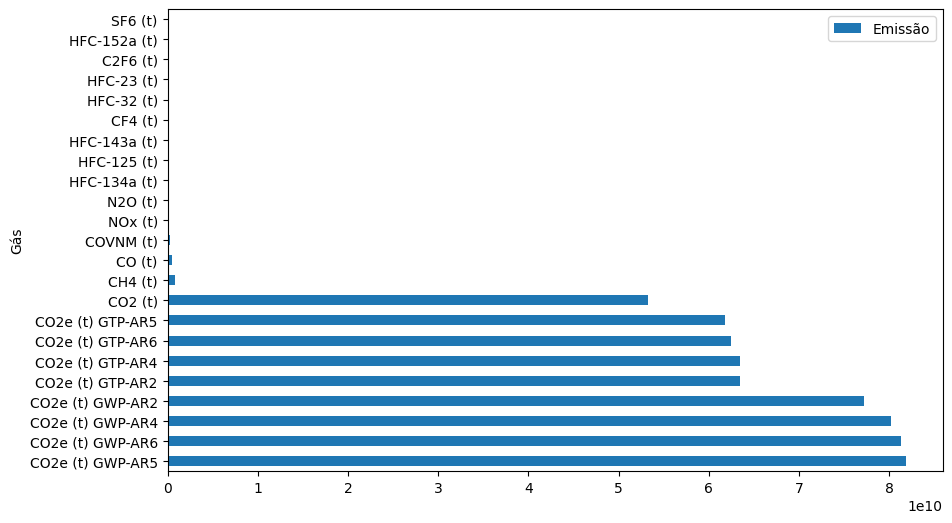

In [33]:
resultado_ordenado.plot(kind = 'barh', figsize = (10,6));

In [34]:
resultado_ordenado.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [35]:
porcentagem = float((resultado_ordenado.iloc[0:9].sum())/(resultado_ordenado['Emissão'].sum()))*100

print(f'A emissão de CO2 corresponde a {porcentagem:.2f}% de emissão total de gases estufas no Brasil de 1970 a 2021')

A emissão de CO2 corresponde a 99.74% de emissão total de gases estufas no Brasil de 1970 a 2021


In [36]:
#1) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para visualizar o dicionário contendo as
# chaves de grupos formados e a lista de índices de cada grupo.


df = emissoes_por_ano.groupby('Nível 1 - Setor').groups.keys()
df

dict_keys(['Agropecuária', 'Energia', 'Mudança de Uso da Terra e Floresta', 'Processos Industriais', 'Resíduos '])

In [37]:
#2) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e localize os dados do grupo "Agropecuária".

resultado = emissoes_por_ano.groupby('Nível 1 - Setor').get_group('Agropecuária')
resultado

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2050.445805
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AP,AGR,ALIM_BEBIDAS,1970,0.000000
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),BA,AGR,ALIM_BEBIDAS,1970,466.934705
...,...,...,...,...,...,...,...,...,...,...,...,...
4855420,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),RS,AGR,ALIM_BEBIDAS,2021,929.545042
4855421,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SC,AGR,ALIM_BEBIDAS,2021,295.813919
4855422,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SE,AGR,ALIM_BEBIDAS,2021,32.734589
4855423,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SP,AGR,ALIM_BEBIDAS,2021,653.155812


In [38]:
#3) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor"
#para identificar a média de emissão de cada atividade econômica no ano de 2021.

resultado = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Nível 1 - Setor')[['Emissão']].mean()
resultado


,Emissão
Nível 1 - Setor,
Agropecuária,149793.768835
Energia,72928.637234
Mudança de Uso da Terra e Floresta,690085.511209
Processos Industriais,787101.255789
Resíduos,106106.723386


In [39]:
#4) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a
# soma de emissão de cada atividade econômica. Ordene os dados da maior para menor emissão.


resultado = emissoes_por_ano.groupby('Nível 1 - Setor')[['Emissão']].sum()
resultado


,Emissão
Nível 1 - Setor,
Agropecuária,1.147284e+11
Energia,1.205314e+11
Mudança de Uso da Terra e Floresta,3.524898e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


In [40]:
resultado_ordenado = resultado.sort_values('Emissão', ascending = False)
resultado_ordenado

,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.524898e+11
Energia,1.205314e+11
Agropecuária,1.147284e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


In [44]:
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
gas_por_setor

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

In [45]:
gas_por_setor.xs('CO2 (t)', level = 0)

,Emissão
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [46]:
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level = [0,1])

,,Emissão
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [47]:
gas_por_setor.xs('CO2 (t)', level = 0).max()

Emissão    3.733930e+10
dtype: float64

In [48]:
gas_por_setor.xs('CO2 (t)', level = 0).idxmax()

Emissão    Mudança de Uso da Terra e Floresta
dtype: object

In [49]:
gas_por_setor.groupby(level = 0).idxmax()

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


In [51]:
gas_por_setor.groupby(level = 0).max()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


In [52]:
valores_max = gas_por_setor.groupby(level = 0).max().values

In [53]:
tabela_sumarizada = gas_por_setor.groupby(level = 0).idxmax()
tabela_sumarizada.insert(1, "Quantidade de Emissão", valores_max)
tabela_sumarizada

,Emissão,Quantidade de Emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


In [54]:
gas_por_setor.swaplevel(0,1)

Emissão
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [55]:
gas_por_setor.swaplevel(0,1).groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


In [78]:
gas_por_setor.groupby(level = 1).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(CO2e (t) GWP-AR5, Agropecuária)"
Energia,"(CO2e (t) GWP-AR6, Energia)"
Mudança de Uso da Terra e Floresta,"(CO2e (t) GWP-AR5, Mudança de Uso da Terra e F..."
Processos Industriais,"(CO2e (t) GWP-AR6, Processos Industriais)"
Resíduos,"(CO2e (t) GWP-AR5, Resíduos )"


In [75]:
tabela_esquerda = gas_por_setor.groupby(level = 0).idxmax()
tabela_direita = gas_por_setor.groupby(level = 0).max().rename(columns = {'Emissão': "Quantidade de Emissão"})

pd.merge(tabela_esquerda ,tabela_direita, how = 'left', on = ['Gás'])

,Emissão,Quantidade de Emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


In [79]:
emissoes_por_ano


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


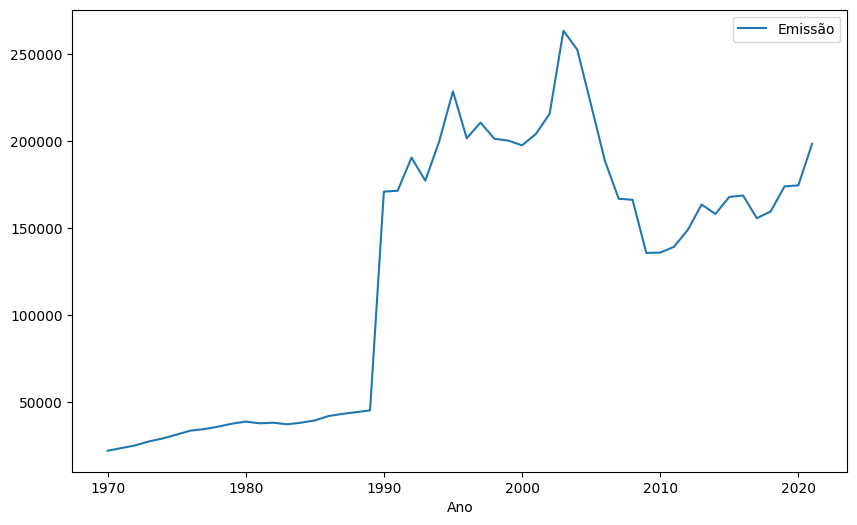

In [81]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().plot(figsize = (10,6));


In [82]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().idxmax()

Emissão    2003
dtype: int64

In [86]:
emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean()

Emissão
Ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [88]:
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual

,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [ ]:
media_emissao_anual = media_emissao_anual.pivot_table(index = 'Ano', columns = 'Gás', values = 'Emissão')
media_emissao_anual

In [ ]:
media_emissao_anual.plot(subplots = True, figsize = (10,40));

In [ ]:
emissao_setores = emissoes_por_ano.pivot_table(values = 'Emissão', index = 'Ano', columns = 'Nível 1 - Setor', aggfunc = 'mean')
emissao_setores

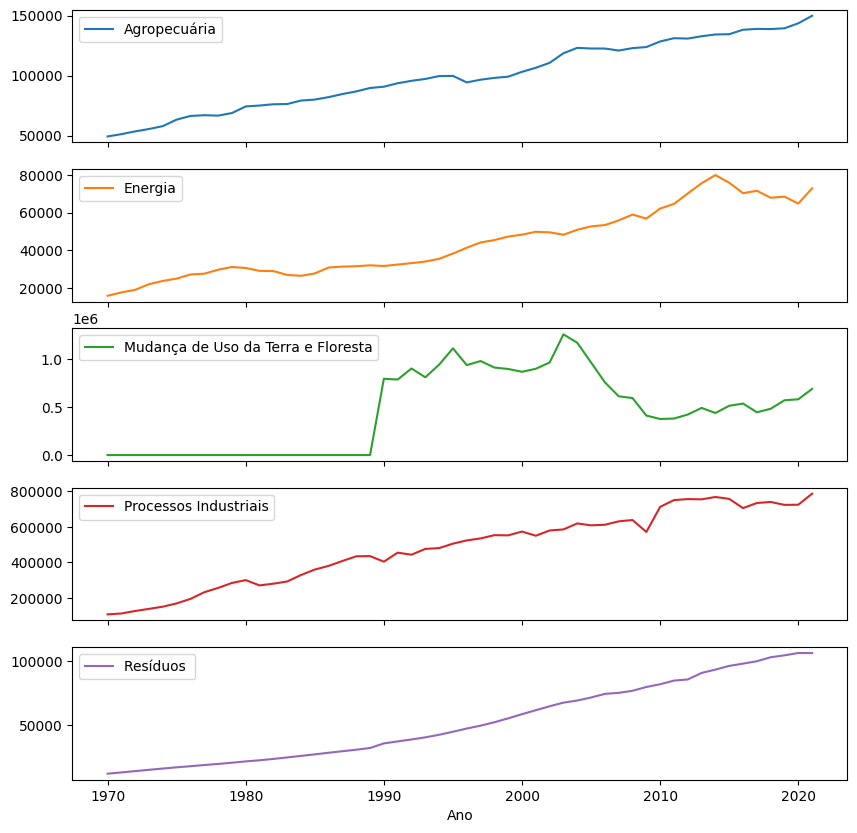

In [92]:
emissao_setores.plot(subplots = True, figsize = (10,10));

In [93]:
#1) Faça um agrupamento de dados com as colunas "Estado" e "Nível 1 - Setor",
#obtendo a soma de emissão e armazenando o resultado em uma tabela.


emissoes_por_ano.groupby(['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()

Emissão
Estado Nível 1 - Setor                                 
AC     Agropecuária                        7.270206e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        7.628303e+08
...                                                 ...
TO     Agropecuária                        2.762475e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[132 rows x 1 columns]

In [101]:
#2) Utilizando a tabela construída na atividade 1, selecione os dados referentes à
#"Energia" do índice "Nível 1 - Setor".

df = emissoes_por_ano.groupby(['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()
df = df.xs('Energia', level = 1)
df

,Emissão
Estado,
AC,2.071751e+08
AL,5.958697e+08
AM,1.916462e+09
AP,2.638059e+08
BA,4.801368e+09
CE,1.879584e+09
DF,9.487860e+08
ES,2.201326e+09
GO,2.761709e+09


In [114]:
#3) Utilizando a tabela construída na atividade 1,
#encontre a atividade econômica com valor máximo de emissão do Estado de Minas Gerais

df = emissoes_por_ano.groupby(['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()
df.xs('MG', level = 0).idxmax()


Emissão    Agropecuária
dtype: object

In [105]:
df = emissoes_por_ano.groupby(['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()
df = df.xs('MG', level = 0)
df

,Emissão
Nível 1 - Setor,
Agropecuária,1.445325e+10
Energia,9.663844e+09
Mudança de Uso da Terra e Floresta,1.262467e+10
Processos Industriais,6.806110e+09
Resíduos,1.111180e+09


In [115]:
#4) Obtenha uma tabela contendo a atividade econômica com máxima emissão para cada Estado.
df = emissoes_por_ano.groupby(['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()
df.groupby(level = 0).idxmax()

,Emissão
Estado,
AC,"(AC, Mudança de Uso da Terra e Floresta)"
AL,"(AL, Agropecuária)"
AM,"(AM, Mudança de Uso da Terra e Floresta)"
AP,"(AP, Mudança de Uso da Terra e Floresta)"
BA,"(BA, Mudança de Uso da Terra e Floresta)"
CE,"(CE, Energia)"
DF,"(DF, Energia)"
ES,"(ES, Processos Industriais)"
GO,"(GO, Agropecuária)"


In [116]:
#5) Obtenha uma tabela contendo o Estado com máxima emissão para cada atividade econômica.
df = emissoes_por_ano.groupby(['Nível 1 - Setor', 'Estado'])[['Emissão']].sum()
df.groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, MG)"
Energia,"(Energia, SP)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, PA)"
Processos Industriais,"(Processos Industriais, MG)"
Resíduos,"(Resíduos , SP)"


In [117]:
emissoes_estados_setor = emissoes_por_ano.groupby(['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()
emissoes_estados_setor.groupby(level = 1).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(MG, Agropecuária)"
Energia,"(SP, Energia)"
Mudança de Uso da Terra e Floresta,"(PA, Mudança de Uso da Terra e Floresta)"
Processos Industriais,"(MG, Processos Industriais)"
Resíduos,"(SP, Resíduos )"


In [121]:
populacao_estado =  pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Python_Data_Science_Alura/04 - Pandas_seleção_e_agrupamento_de_dados/POP2022_Municipios.xls", header = 1, skipfooter = 34)
populacao_estado

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


In [122]:
populacao_estado.groupby('UF').sum(numeric_only= True) #não somou a população

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


In [123]:
populacao_estado['POPULAÇÃO'].astype(int)

ValueError: ignored

In [129]:
populacao_estado[populacao_estado['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [132]:
populacao_estado = populacao_estado.assign(populacao_sem_parenteses = populacao_estado['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
                                           populacao = lambda x :x.loc[:, 'populacao_sem_parenteses'].replace('\.', '', regex = True))

In [133]:
populacao_estado[populacao_estado['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [134]:
populacao_estado = populacao_estado.astype({'populacao': 'int64'})
populacao_estado

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
0,RO,11,15,Alta Floresta D'Oeste,21558,21558,21558
1,RO,11,23,Ariquemes,100896,100896,100896
2,RO,11,31,Cabixi,5107,5107,5107
3,RO,11,49,Cacoal,92202,92202,92202
4,RO,11,56,Cerejeiras,15237,15237,15237
...,...,...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046,14046,14046
5566,GO,52,22054,Vicentinópolis,8776,8776,8776
5567,GO,52,22203,Vila Boa,3686,3686,3686
5568,GO,52,22302,Vila Propício,5646,5646,5646


In [137]:
populacao_estado = populacao_estado.groupby('UF')[['populacao']].sum().reset_index()
populacao_estado

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


In [152]:
emissoes_estados = emissoes_por_ano.groupby(['Estado', 'Ano'])[['Emissão']].sum()
emissoes_estados_2021 = emissoes_estados.xs(2021, level = 1).reset_index()
emissoes_estados_2021

,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


In [160]:
populacao_estado = populacao_estado.rename(columns = {'UF': "Estado"})


In [164]:
tabela_populacao_emissao = pd.merge(populacao_estado, emissoes_estados_2021, how = 'left', on = 'Estado')
#Se não quisesse mudar o nome da coluna left_on = "Nome da coluna do dataset esquerdo com a chave" e right_on = "nome..."
#teria 2 colunas uma "uf" e outra de "estado"

In [163]:
tabela_populacao_emissao

,Estado,populacao,Emissão
0,AC,829780,3.505471e+08
1,AL,3125254,6.261279e+07
2,AM,3952262,1.189649e+09
3,AP,774268,3.568410e+07
4,BA,14659023,5.932251e+08
5,CE,8936431,2.034731e+08
6,DF,2923369,5.668738e+07
7,ES,3975100,2.697547e+08
8,GO,6950976,6.008081e+08
9,MA,6800605,9.476324e+08


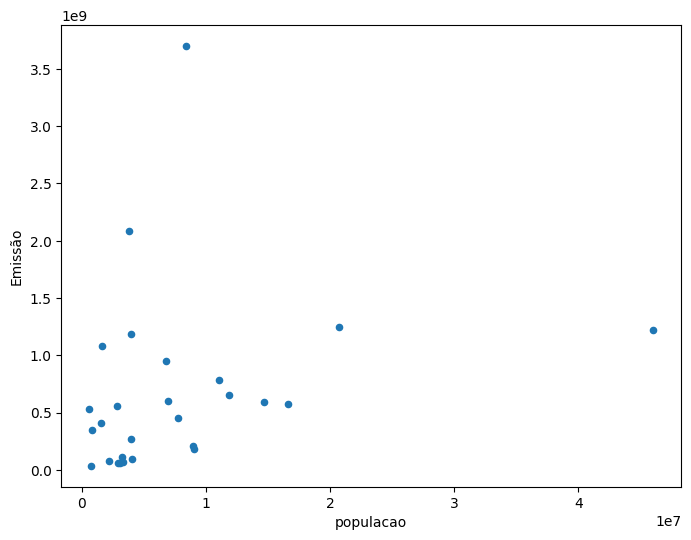

In [168]:
tabela_populacao_emissao.plot(x = 'populacao', y = 'Emissão', kind = "scatter", figsize = (8,6));

In [169]:
import plotly.express as px

In [173]:
px.scatter(data_frame = tabela_populacao_emissao, x = 'populacao', y = 'Emissão', text = 'Estado', opacity = 0)

In [177]:
tabela_populacao_emissao = tabela_populacao_emissao.assign(emissao_per_capita = tabela_populacao_emissao['Emissão']/tabela_populacao_emissao['populacao'])
tabela_populacao_emissao = tabela_populacao_emissao.sort_values('emissao_per_capita', ascending = False)
tabela_populacao_emissao

,Estado,populacao,Emissão,emissao_per_capita
21,RR,634805,5.282071e+08,832.077694
20,RO,1616379,1.083515e+09,670.334662
12,MT,3784239,2.081610e+09,550.073647
13,PA,8442962,3.701684e+09,438.434230
0,AC,829780,3.505471e+08,422.457928
2,AM,3952262,1.189649e+09,301.004463
26,TO,1584306,4.082159e+08,257.662300
11,MS,2833742,5.551278e+08,195.899220
9,MA,6800605,9.476324e+08,139.345312
8,GO,6950976,6.008081e+08,86.435075


In [178]:
px.bar(data_frame = tabela_populacao_emissao, x = 'Estado', y = 'emissao_per_capita')

In [181]:
px.scatter(data_frame = tabela_populacao_emissao, x = 'populacao', y = 'Emissão', text = 'Estado', size = 'emissao_per_capita')